In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
tickers = pd.read_csv("Investment_Universe.csv", sep=";")

In [3]:
bonds_universe = tickers[tickers["MainClass"]=="Bond"].copy()

In [4]:
bond_tickers = list(bonds_universe["Ticker"])

In [5]:
all_data = yf.download(bond_tickers,start="2016-06-30",end="2021-07-01")

[*********************100%***********************]  11 of 11 completed


In [6]:
bonds_close = all_data["Close"].copy()

In [7]:
bonds_close.drop(["E20Y.SW","IEBB.SW","US3.PA"], axis=1,inplace=True)

In [8]:
bonds_close.isna().sum()/len(bonds_close) * 100

GOVT       2.552204
IBTS.AS    1.082753
IEAC.L     2.088167
IHYG.L     2.088167
LQDE.L     2.088167
SDIG.L     2.088167
SEGA.L     2.088167
SHYU.L     2.088167
dtype: float64

In [9]:
bonds_close.fillna(method="ffill",inplace=True)
bonds_close.fillna(method="bfill",inplace=True)

In [10]:
bonds_close.isna().sum()/len(bonds_close) * 100

GOVT       0.0
IBTS.AS    0.0
IEAC.L     0.0
IHYG.L     0.0
LQDE.L     0.0
SDIG.L     0.0
SEGA.L     0.0
SHYU.L     0.0
dtype: float64

In [11]:
bonds_close.columns

Index(['GOVT', 'IBTS.AS', 'IEAC.L', 'IHYG.L', 'LQDE.L', 'SDIG.L', 'SEGA.L',
       'SHYU.L'],
      dtype='object')

In [12]:
bonds_diff = bonds_close.pct_change()

In [13]:
bonds_diff = bonds_diff.iloc[1:]

<AxesSubplot:>

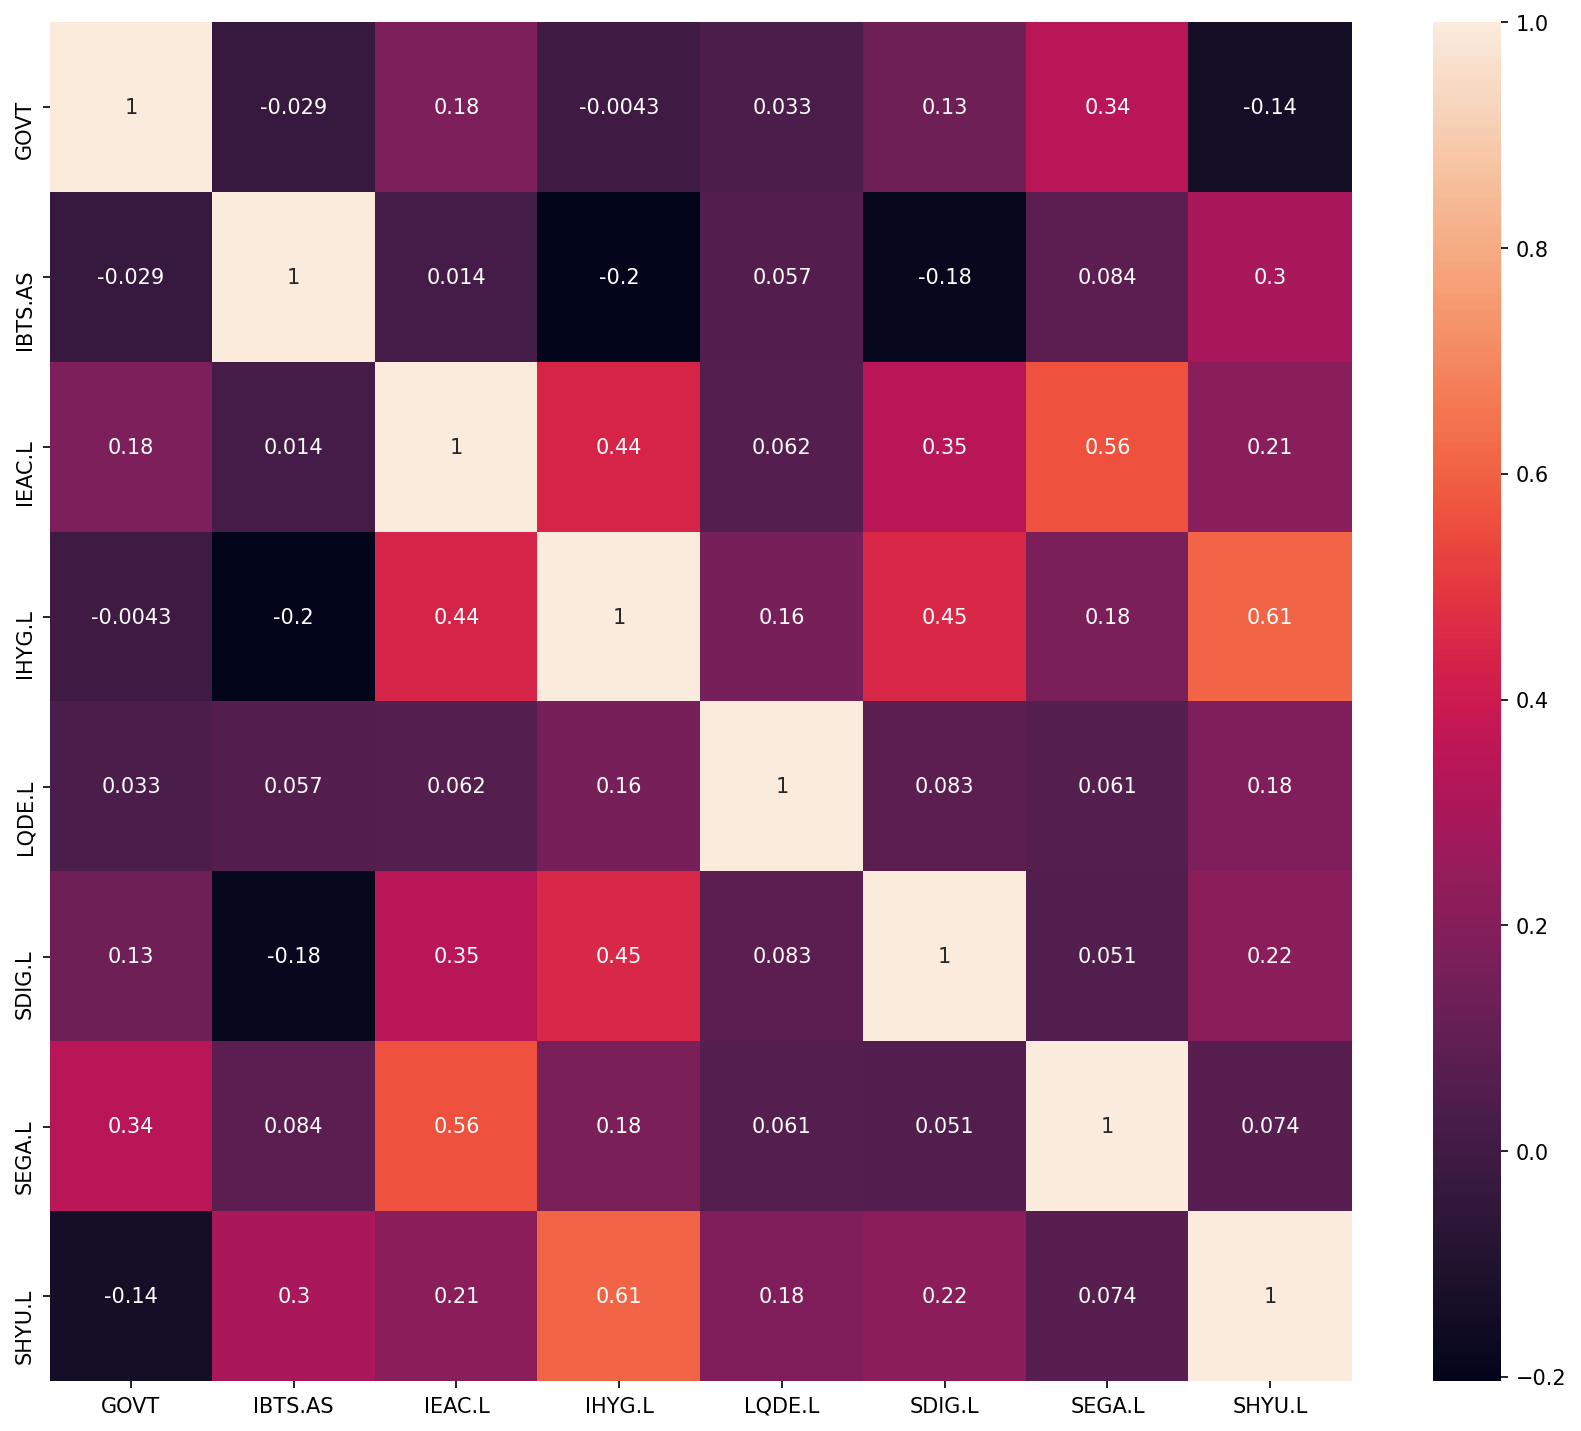

In [14]:
plt.figure(figsize=(14,12), dpi=150)
sns.heatmap(data=bonds_diff.corr(),annot=True)
#plt.savefig("bond_heatmap.png", bbox_inches="tight")

In [15]:
alt_tickers = list(tickers[(tickers["MainClass"] == "Commodities") | (tickers["MainClass"] == "Real Estate")]["Ticker"])

In [16]:
alt_tickers

['CRB.PA', 'SGLN.L', 'IPRP.AS', 'IUSP.DE']

In [17]:
alt_data = yf.download(alt_tickers, start="2016-06-30", end="2021-07-01")

[*********************100%***********************]  4 of 4 completed


In [18]:
alt_close = alt_data["Close"].copy()

In [19]:
alt_close.isna().sum()/len(alt_close)

CRB.PA     0.003115
IPRP.AS    0.003894
IUSP.DE    0.014019
SGLN.L     0.056854
dtype: float64

In [20]:
alt_close.fillna(method="ffill",inplace=True)
alt_close.fillna(method="bfill",inplace=True)

In [21]:
alt_close.isna().sum()/len(alt_close)

CRB.PA     0.0
IPRP.AS    0.0
IUSP.DE    0.0
SGLN.L     0.0
dtype: float64

In [22]:
alt_diff = alt_close.pct_change()

In [23]:
alt_diff = alt_diff[2:]

In [24]:
alt_diff

,CRB.PA,IPRP.AS,IUSP.DE,SGLN.L
Date,,,,
2016-07-01,0.003433,0.006613,0.012546,0.014568
2016-07-04,-0.001244,-0.001577,-0.002915,0.008003
2016-07-05,-0.014014,-0.014607,0.012061,-0.000008
2016-07-06,-0.009160,-0.014957,-0.001445,0.011469
2016-07-07,-0.002869,0.002440,-0.007957,-0.006997
...,...,...,...,...
2021-06-24,-0.002471,0.004390,-0.007559,-0.003937
2021-06-25,0.006223,-0.000920,0.004458,0.000172
2021-06-28,0.004804,-0.011860,-0.002034,0.000687


<AxesSubplot:>

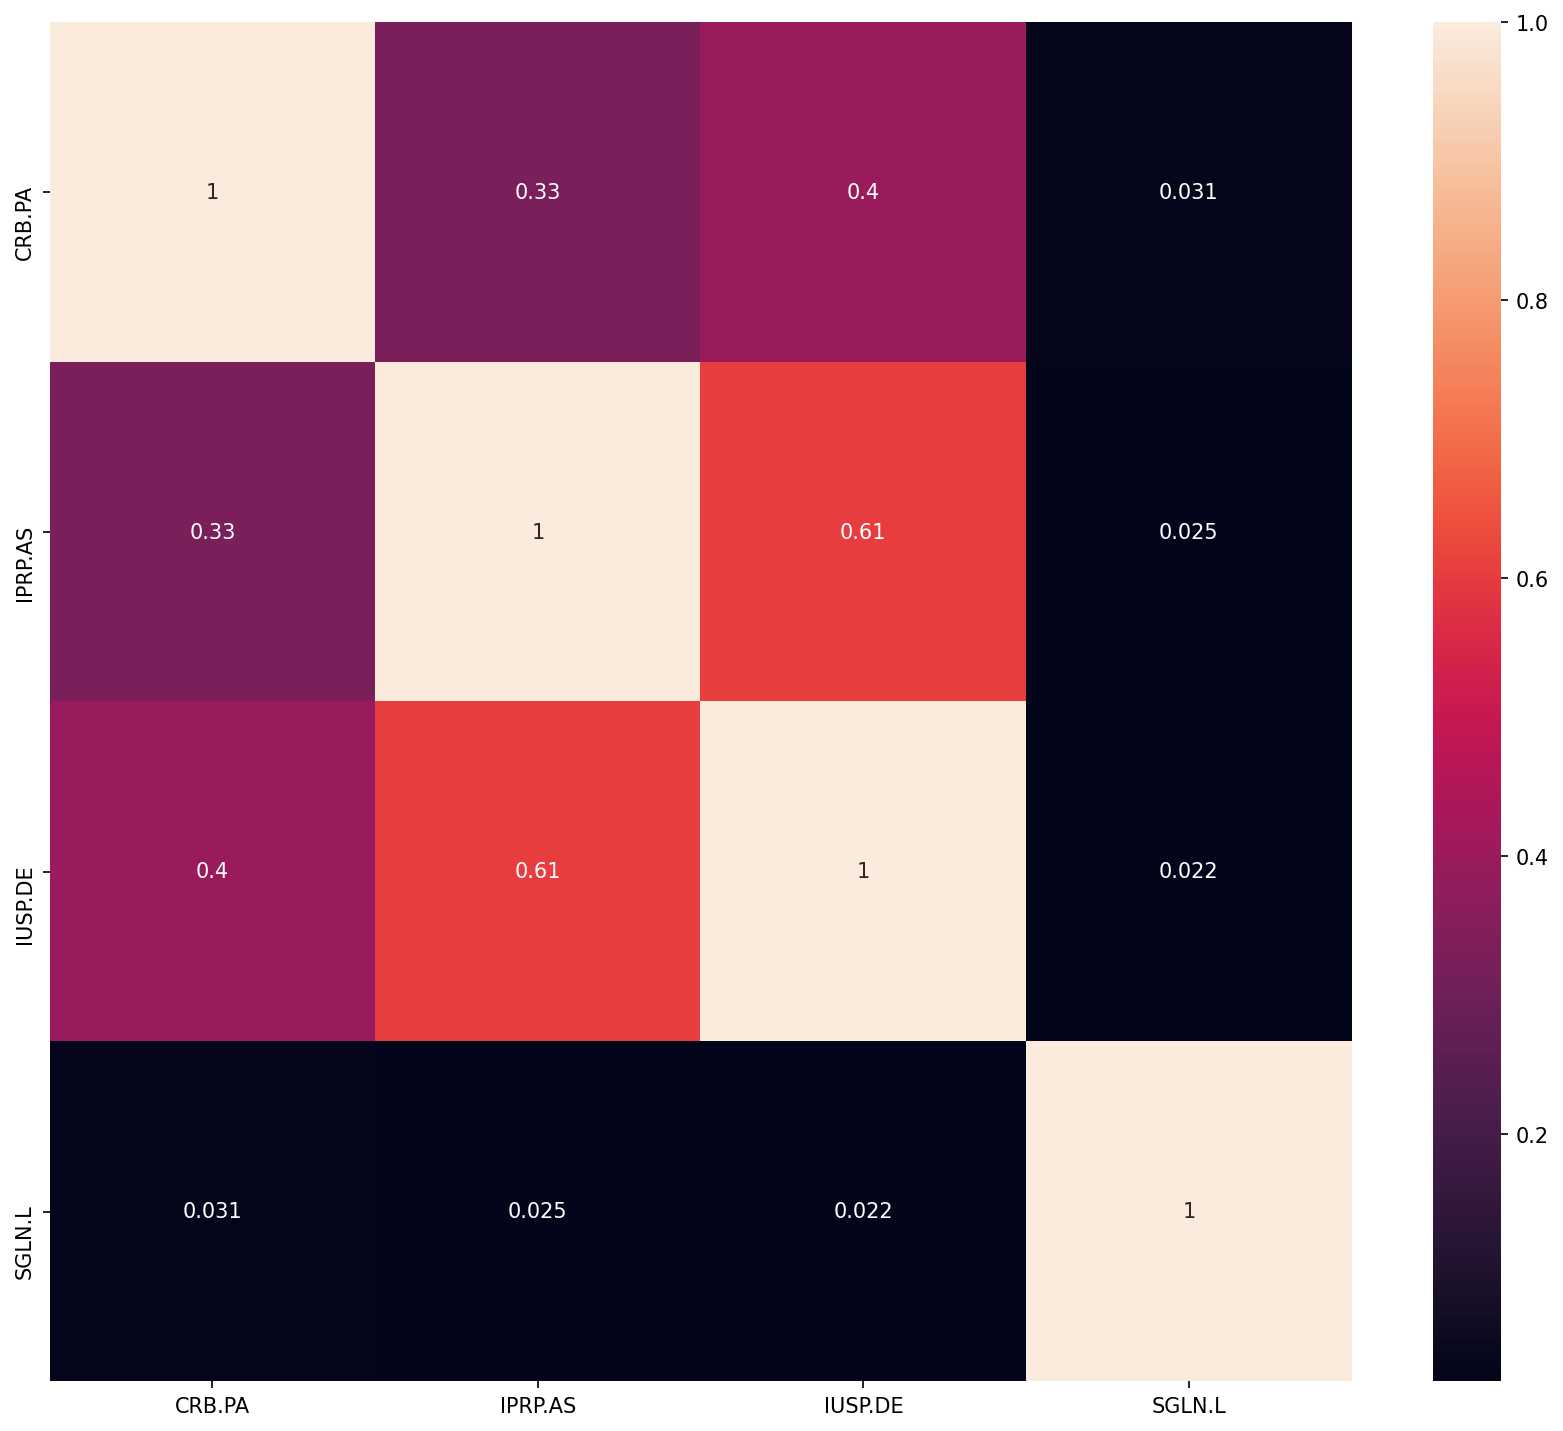

In [25]:
plt.figure(figsize=(14,12), dpi=150)
sns.heatmap(data=alt_diff.corr(), annot=True)
#plt.savefig("alt_heatmap.png", bbox_inches="tight")

In [26]:
alt_diff.to_csv("alt_diff.csv", header=True)

In [27]:
bonds_diff.to_csv("bonds_diff.csv", header=True)